In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# 1- Import dataset
pdata = pd.read_csv("airbnb.csv")

In [7]:
# Remove some extra columns
#pdata = pdata.drop(['id','price','number_of_reviews','latitude','longitude','review_scores_rating'], axis=1)
pca = pdata.drop(['id','property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city','description','first_review','host_has_profile_pic','host_identity_verified','host_response_rate','host_since','instant_bookable','last_review','neighbourhood','zipcode'], axis=1)

In [87]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   price                   74111 non-null  float64
 2   log_price               74111 non-null  float64
 3   property_type           74111 non-null  object 
 4   room_type               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [6]:
pdata.skew()

id                     -0.260616
price                   4.298408
log_price               0.514695
accommodates            2.231561
bathrooms               3.691453
cleaning_fee           -1.059603
latitude               -0.534766
longitude              -0.407100
number_of_reviews       3.702835
review_scores_rating   -3.380861
bedrooms                1.989849
beds                    3.358000
dtype: float64

In [ ]:
pdata.head()

In [ ]:
pdata.describe()

In [ ]:
pdata.nunique()

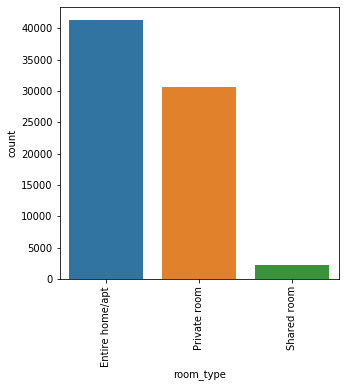

In [4]:
#Looking at the distribution of Room Type
plt.figure(figsize=(5,5))
sns.countplot(pdata['room_type'])
plt.xticks(rotation=90)
plt.show()

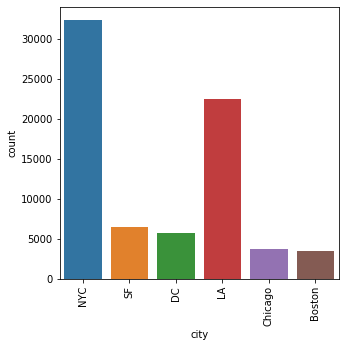

In [9]:
#Looking at the distribution of Room Type
plt.figure(figsize=(5,5))
sns.countplot(pdata['city'])
plt.xticks(rotation=90)
plt.show()

In [3]:
#value_list = ["Apartment","House","Condominium","Loft","Townhouse"]
value_list = ["Apartment","House"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"


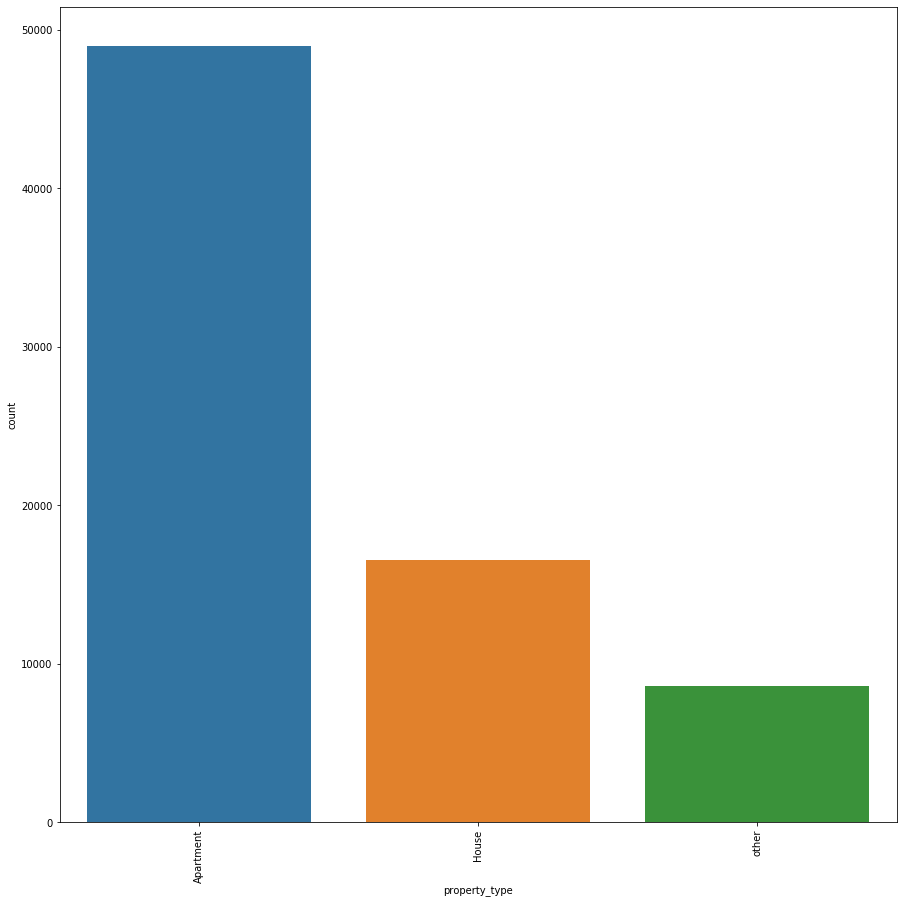

In [64]:
#Looking at the distribution of AgeDays
plt.figure(figsize=(15,15))
sns.countplot(pdata['property_type'])
plt.xticks(rotation=90)
plt.show()

In [73]:
pdata['log_reviews'] = np.log(pdata.review_scores_rating)

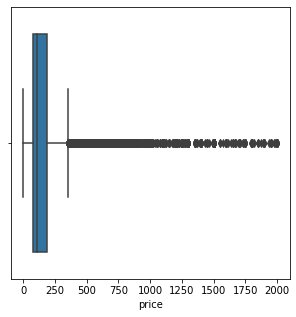

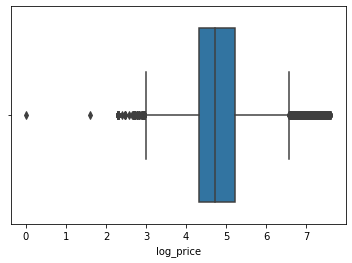

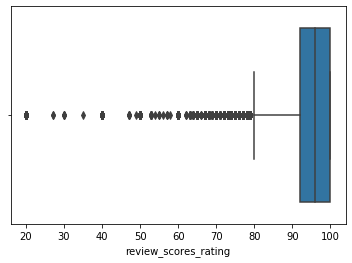

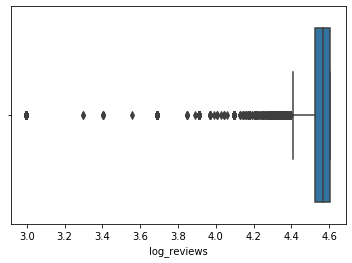

In [11]:
plt.figure(figsize=(5,5))
# distplot for continous columns
for i in ['price','log_price','review_scores_rating','log_reviews']:
    sns.boxplot(pdata[i])
    plt.show()

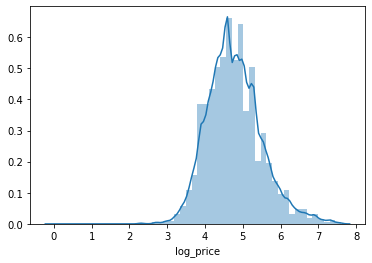

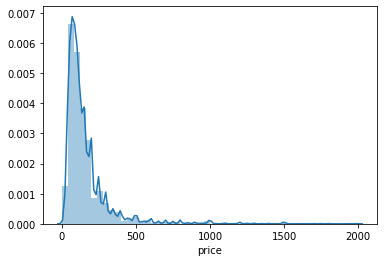

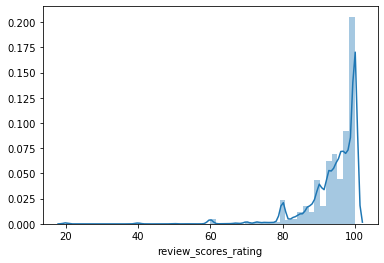

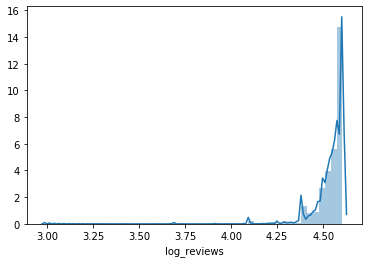

In [13]:
#Looking at tails and distributions of the following continuous values
for i in ['log_price','price','review_scores_rating','log_reviews']:
    sns.distplot(pdata[i])
    plt.show()

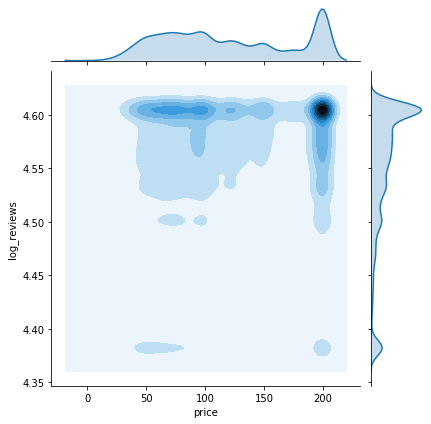

In [77]:
sns.jointplot(pdata['price'],pdata['log_reviews'], kind='kde');

In [72]:
z = pdata[pdata['review_scores_rating']< 80]
for i in list (z[z['review_scores_rating']< 80].index):
    pdata.loc[i,'review_scores_rating'] = 80

z = pdata[pdata['price']> 200]
for i in list (z[z['price']> 200].index):
    pdata.loc[i,'price'] = 200


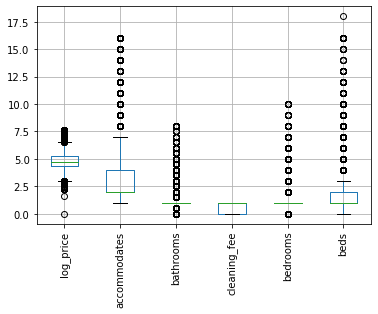

In [35]:
pdata.boxplot(rot=90)

In [ ]:
pdata.groupby(['room_type']).median().transpose()

In [ ]:
sns.jointplot(pdata['accommodates'],pdata['review_scores_rating'], kind='kde');

In [ ]:
mydata = pdata.iloc[:, 1:27]
plt.figure(figsize=(9,9))
sns.heatmap(mydata.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [ ]:
sns.pairplot(pdata[['accommodates','review_scores_rating']])

In [ ]:
pdata.nunique()

In [ ]:
#sns.pairplot(pca)

sns.pairplot(pdata)

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)
    
    plt.subplots(figsize=(8,8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumlative explained variance')
    print ('Cumulative Explained variance at 200 components:', sum(pca.explained_variance_ratio_[0:199]))
    
plot_pca(pca)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)